### Modelling - second pass

In [1]:
import pandas as pd
import numpy as np

In [4]:
# reading in the dataset

activities_spend = pd.read_csv("clean_data/activities_spend.csv")

In [5]:
# examining the dataset

activities_spend.head()

,value,activity_type,spend_unit
0,1662,Shopping,million (£)
1,469,Live entertainment,million (£)
2,892,Evening out,million (£)
3,354,Attend personal event,million (£)
4,400,Live entertainment,million (£)


In [6]:
# creating dummy variables

activities_spend = pd.get_dummies(activities_spend, drop_first = True)

activities_spend.head()

,value,activity_type_Day out,activity_type_Evening out,activity_type_Leisure activity,activity_type_Live entertainment,activity_type_Shopping,activity_type_Visit attraction,activity_type_Visit family/friends
0,1662,0,0,0,0,1,0,0
1,469,0,0,0,1,0,0,0
2,892,0,1,0,0,0,0,0
3,354,0,0,0,0,0,0,0
4,400,0,0,0,1,0,0,0


In [ ]:
# this looks better - there are only 7 dummy variables, and therefore 7 variables now.
# This means less of a chance of overfitting.

In [ ]:
# building the model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# setting the response array

response_var = activities_spend["value"]

# putting the predictors in a dataframe
predictors_vars = activities_spend.drop(columns = "value")

In [9]:
# defining the model

model = LinearRegression()

model.fit(predictors_vars, response_var)

LinearRegression()

In [10]:
# getting the r-sq value

model.score(predictors_vars, response_var)

0.6909188806674171

In [ ]:
# This is a lot better, and a lot more what I'd expect for a good model.
# The first one seemed massively overfitted, where this is more realistic. Hopefully I'll have good p-values here too.

In [11]:
# getting the coefficients

model.intercept_

229.71428571428595

In [12]:
model.coef_

# these numbers don't seem as scattered as the first lot did - but maybe that just because there's fewer of them?

array([ 210.71428571,  583.14285714,  271.95238095,  161.78571429,
       1230.57142857,  234.71428571, 1219.14285714])

In [13]:
# getting the p-values

In [14]:
import statsmodels.api as sm

/usr/local/anaconda3/envs/python39/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [15]:
predictors_vars = sm.add_constant(predictors_vars)

In [16]:
sm_model = sm.OLS(response_var, predictors_vars).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     28.74
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.07e-20
Time:                        14:00:38   Log-Likelihood:                -678.36
No. Observations:                  98   AIC:                             1373.
Df Residuals:                      90   BIC:                             1393.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [17]:
# check diagnostic plots

residuals = sm_model.fittedvalues - response_var

Text(0, 0.5, 'Residual')

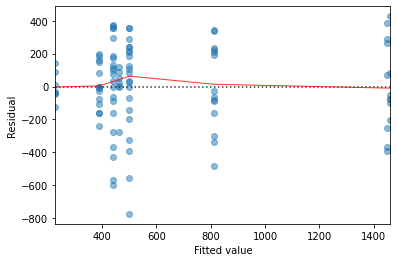

In [18]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt

sns.residplot(x = sm_model.fittedvalues, y = residuals, # data to plot
                          lowess = True, # Fit a lowess smoother to the residual scatterplot
                          scatter_kws = {'alpha': 0.5}, # set the transparency of the scatter points
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8}) # set the line colour/transparency
plt.xlabel("Fitted value")
plt.ylabel("Residual")

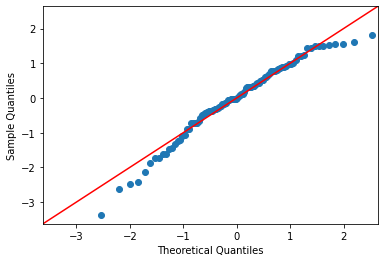

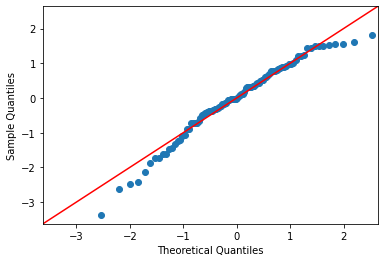

In [19]:
import scipy.stats as stats

sm.qqplot(residuals, dist=stats.t, fit=True, line='45')

In [ ]:
# the residual plot looks a bit funny, but that's because there's only categorical data to work with. 
# I could try putting the year back in

I think I might try building a random forest model instead, and see how that performs. The problems I'm facing are missing data (I only have one categorical variable per dataset, generally), which in turn breaks into too many dummy variables - giving me an awkward challenge of missing data whilst also overfitting. It seems like a random forest might perform well here, because it is binary on the categorical varibales, and could also correct these issues.

### Random forest model

In [20]:
# loading in data - using the dataset with all the variables

In [21]:
import pandas as pd
import numpy as np

In [56]:
activities_spend_forest = pd.read_csv("clean_data/activities_spend.csv")

In [57]:
# examining data

activities_spend_forest.head()

,value,activity_type,spend_unit
0,1662,Shopping,million (£)
1,469,Watch live sports,million (£)
2,892,Night out,million (£)
3,354,Attend personal event,million (£)
4,400,Watch live sports,million (£)


In [58]:
# creating dummy variables

activities_spend_forest = pd.get_dummies(activities_spend_forest, drop_first = True)

activities_spend_forest

,value,activity_type_Attend public event,activity_type_Day out,activity_type_Day out (spa),activity_type_Day trip - leisure,activity_type_Eating out,activity_type_Entertainment - cinema etc.,activity_type_Leisure activity,activity_type_Night out,activity_type_Outdoor leisure activity,activity_type_Shopping,activity_type_Sports participation,activity_type_Visit family/friends,activity_type_Visitor attraction,activity_type_Watch live sports
0,1662,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,469,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,892,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,400,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1959,0,0,0,0,1,0,0,0,0,0,0,0,0,0
101,1376,0,0,0,0,0,0,0,0,0,0,0,1,0,0
102,903,0,0,0,0,0,1,0,0,0,0,0,0,0,0
103,604,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [59]:
# splitting the data into predictors, and target variable - before making the test/train split

activities_spend_predictors = activities_spend_forest.drop(columns="value")
activities_spend_response = activities_spend_forest["value"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
act_spe_pre_train, act_spe_pre_test, act_spe_res_train, act_spe_res_test = (
    train_test_split(
        activities_spend_predictors,
        activities_spend_response,
        test_size = 0.1,
        random_state = 7
    )
)

In [62]:
# building the random forest model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
# run the model with 100 trees
model = RandomForestClassifier(n_estimators = 100)


In [65]:
# train the model on the training data
model.fit(act_spe_pre_train, act_spe_res_train)

RandomForestClassifier()

In [72]:
scores = cross_val_score(
    model, act_spe_pre_train, act_spe_res_train, scoring='accuracy', cv=2
)
np.mean(scores)


/usr/local/anaconda3/envs/python39/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


0.02127659574468085

This isn't a great result / model. The next thing I will try, is that I will build a logistic regression (and the last thing I will try, not today, and not in python), is building a k-means clustering.

### Logistic regression

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
activities_spend_logistic = pd.read_csv("clean_data/activities_spend.csv")

In [4]:
# creating dummy variables

activities_spend_logistic = pd.get_dummies(activities_spend_logistic, drop_first = True)
activities_spend_logistic

,value,activity_type_Attend public event,activity_type_Day out,activity_type_Day out (spa),activity_type_Day trip - leisure,activity_type_Eating out,activity_type_Entertainment - cinema etc.,activity_type_Leisure activity,activity_type_Night out,activity_type_Outdoor leisure activity,activity_type_Shopping,activity_type_Sports participation,activity_type_Visit family/friends,activity_type_Visitor attraction,activity_type_Watch live sports
0,1662,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,469,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,892,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,400,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1959,0,0,0,0,1,0,0,0,0,0,0,0,0,0
101,1376,0,0,0,0,0,0,0,0,0,0,0,1,0,0
102,903,0,0,0,0,0,1,0,0,0,0,0,0,0,0
103,604,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [5]:
# splitting the data into predictors, and target variable - before making the test/train split

activities_spend_predictors = activities_spend_logistic.drop(columns="value")
activities_spend_response = activities_spend_logistic["value"]

In [8]:
act_spe_pre_train, act_spe_pre_test, act_spe_res_train, act_spe_res_test = (
    train_test_split(
        activities_spend_predictors,
        activities_spend_response,
        test_size = 0.1,
        random_state = 7
    )
)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# building the model

In [11]:
model = LogisticRegression()
model.fit(act_spe_pre_train, act_spe_res_train)
scores = cross_val_score(
    model, act_spe_pre_train, act_spe_res_train, scoring='accuracy', cv=2
)
scores

# this has the same problem as random forest did

/usr/local/anaconda3/envs/python39/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


array([0.0212766, 0.0212766])

In [12]:
print(model.score(act_spe_pre_train, act_spe_res_train))
print(np.mean(scores))

0.1702127659574468
0.02127659574468085


In [13]:
model.score(act_spe_pre_test, act_spe_res_test)


0.0